<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_5_SelectionAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archisha Sinha**
##Domain: Evolutionary Computing
##Topic: Selection Algorithms

###Aim: Implementation of various parent selection algorithms such as Roulette Wheel Selection, Tournament Selection, Rank selection

##Parent Selection

In genetic algorithm, the idea is to select fittest individuals to produce offspring of the next generation. This process of selecting the fittest individuals is called as parent selection. Following are some fitness selection algorithms

· Fitness Proportional Selection (FPS)/Cannonical Selection

  o Roulette Wheel Selection

  o Stochastic Universal Sampling

· Tournament Selection

· Rank Based Selection

· Uniform Parent Selection

##Roulette Wheel Selection

· Consider a wheel and divide it into m divisions

· Where m is the number of chromosomes in populations

· Area occupied by each chromosome is proportional to its fitness value

· A fixed point is chosen on the wheel circumference

· Wheel is rotated

· The region of the wheel which comes in front of the fixed point is chosen as the parent

· For the second parent, the same process is repeated

· It is to be noted that fitness proportionate selection methods don’t work for cases where the fitness can take a negative value

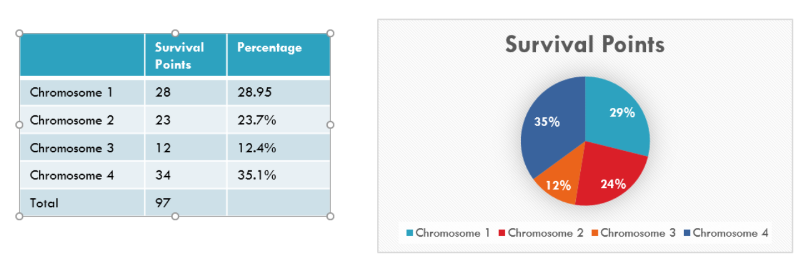

Algorithm:

· Let there be 𝒎 chromosomes

· Find total of all the fitness values, say sum

· Find individual probability for each chromosome 𝒎𝒊 as 𝑷𝒊= 𝒇𝒊/𝒔𝒖𝒎

· Calculate cdf 𝑪𝒊 for mi as = ∑𝒑𝒊

· Generate a random number , say 𝒓, between 𝟎 𝒂𝒏𝒅 𝟏

· If 𝒓 <𝑪𝟏

o Then select 𝒎𝟏

· Else if 𝑪𝒊−𝟏<𝒓<𝑪𝒊:

o Then select 𝒎𝒊

##Tournament Selection

· The previous two selection methods and the algorithms used to sample from their probability distributions relied on a knowledge of the entire population

· However, in certain situations,

o if the population size is very large, or

o if the population is distributed in some way (perhaps on a parallel system)

· Obtaining this knowledge is either highly time consuming or at worst impossible

· Tournament selection is an operator with the useful property that

o it does not require any global knowledge of the population

o nor a quantifiable measure of quality

· Instead it only relies on an ordering relation that can compare and rank any two individuals

· It is therefore conceptually simple and fast to implement and apply

· The application of tournament selection to select λ members of a pool of μ individuals works according to the procedure shown in the algorithm below

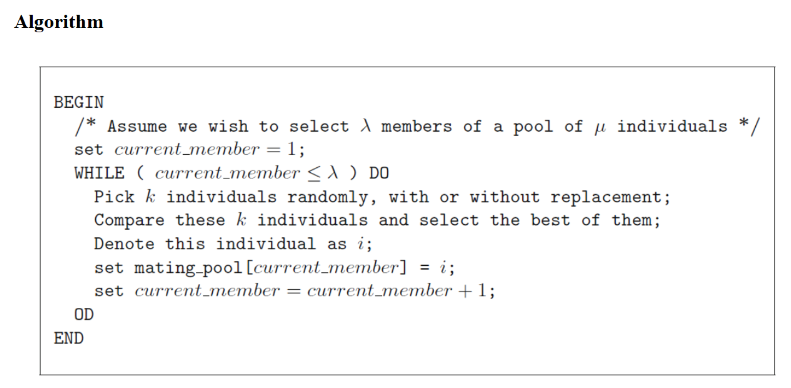

##Rank Based Selection

· It works with negative fitness values

· It mostly used when the individuals in the population have very close fitness values

· Rank based selection removes the concept of a fitness value while selecting a parent

· Individual in the population is ranked according to their fitness

· Depends on the rank of each individual and not the fitness

· The higher ranked individuals are preferred more than the lower ranked ones

###**Task to be completed**

i. Consider the problem of maximizing 𝑥2+𝑦2

where 1 ≤ 𝑥 ≤ 15 and 𝑦 ≥ 3 with 𝑥 + 𝑦≤ 7

· Implement Roulette wheel selection algorithm for the above problem to obtain a new generation for generational model and steady state model

· Implement Tournament selection algorithm for the above problem to obtain a new generation for generational model and steady state model

· Implement Rank based selection algorithm for the above problem to obtain a new generation for generational model and steady state model


ii. Compare all the three algorithms for both the models with reference to the mean fitness value obtained in the next generation.

In [ ]:
import random

In [ ]:
# Define the bounds for x and y
x_min = 1
x_max = 15
y_min = 3
y_max = 7

In [ ]:
# Define the fitness function
def fitness(x, y):
    return x**2 + y**2

In [ ]:
# Generate random binary numbers of 5 digits
def generate_binary_numbers(n):
    return [''.join([random.choice('01') for _ in range(5)]) for _ in range(n)]

In [ ]:
# Parent selection: Randomly select two parents
def parent_selection(binary_numbers):
    return random.sample(binary_numbers, 2)

In [ ]:
# Recombination (Crossover): Single point crossover
def recombination(parent1, parent2):
    crossover_point = random.randint(1, 3)  # Choose crossover point
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [ ]:
# Mutation: Flip one random bit
def mutation(individual):
    index = random.randint(0, 4)
    mutated_bit = '1' if individual[index] == '0' else '0'
    return individual[:index] + mutated_bit + individual[index+1:]

In [ ]:
# Fitness evaluation for binary individuals
def evaluate_fitness(binary_individual):
    # Convert binary to integer values for x and y
    x = x_min + int(binary_individual[:3], 2)
    y = y_min + int(binary_individual[3:], 2)
    # Check constraints
    if x + y > 7:
        return 0  # Penalty for violating constraint
    else:
        return fitness(x, y)

In [ ]:
# Roulette wheel selection
def roulette_wheel_selection(binary_population):
    total_fitness = sum(evaluate_fitness(individual) for individual in binary_population)
    selection_point = random.uniform(0, total_fitness)
    current_sum = 0
    for individual in binary_population:
        current_sum += evaluate_fitness(individual)
        if current_sum >= selection_point:
            return individual

In [ ]:
# Tournament selection
def tournament_selection(binary_population, k=3):
    tournament_contestants = random.sample(binary_population, k)
    return max(tournament_contestants, key=evaluate_fitness)

In [ ]:
# Rank-based selection
def rank_based_selection(binary_population):
    population_size = len(binary_population)
    ranked_population = sorted(binary_population, key=lambda x: evaluate_fitness(x), reverse=True)
    total_rank = population_size * (population_size + 1) / 2
    selection_point = random.uniform(0, total_rank)
    current_sum = 0
    for i, individual in enumerate(ranked_population):
        current_sum += i + 1
        if current_sum >= selection_point:
            return individual

In [ ]:
# 1: Generate a population of binary numbers
binary_population = generate_binary_numbers(5)
print("Initial Population:", binary_population)

Initial Population: ['00100', '10111', '11100', '00010', '01100']


In [ ]:
# 2: Parent Selection
parents = parent_selection(binary_population)
parent1, parent2 = parents
print("Selected Parents:", parent1, parent2)

Selected Parents: 00100 10111


In [ ]:
# 3: Recombination (Crossover)
child1, child2 = recombination(parent1, parent2)
print("Children after Recombination:", child1, child2)


Children after Recombination: 00111 10100


In [ ]:
# 4: Mutation
child1 = mutation(child1)
child2 = mutation(child2)
print("Children after Mutation:", child1, child2)

Children after Mutation: 00011 00100


In [ ]:
# 5: Fitness Evaluation
fitness_child1 = evaluate_fitness(child1)
fitness_child2 = evaluate_fitness(child2)
print("Fitness of Children:", fitness_child1,"AND", fitness_child2)

Fitness of Children: 37 AND 13


In [ ]:
# 6: Selection using Roulette Wheel
selected_individual_rw = roulette_wheel_selection(binary_population)
print("Selected Individual (Roulette Wheel):", selected_individual_rw)

Selected Individual (Roulette Wheel): 00100


In [ ]:
# 7: Selection using Tournament
selected_individual_ts = tournament_selection(binary_population)
print("Selected Individual (Tournament):", selected_individual_ts)

Selected Individual (Tournament): 00010


In [ ]:
# 8: Selection using Rank-based
selected_individual_rbs = rank_based_selection(binary_population)
print("Selected Individual (Rank-based):", selected_individual_rbs)

Selected Individual (Rank-based): 00010


##CONCLUSION:
Roulette Wheel Selection assigns probability based on fitness, favoring individuals with higher fitness; Tournament Selection randomly selects individuals for a competition, choosing the winner; Rank-Based Selection prioritizes individuals by their fitness rank, providing a higher chance to higher-ranked individuals.